# Hyperopt: Space Configuration

One of the most valuable offers of Hyperopt is the flexibility it provides to create priors over the hyperparameters distributions.

Hyperopt offers:

- Multiple distributions
- Possibility to combine distributions
- Possibility to create nested spaces
- Multiple configuration ways including lists, dictionaries and tuples


## Distributions

Taken from [hp documentation](http://hyperopt.github.io/hyperopt/getting-started/search_spaces/) 

- **hp.choice**: returns one of several options (suitable for categorical hyperparams)
- **hp.randint**: returns a random integer between 0 and an upper limit
- **hp.uniform**: returns a value uniformly between specified limits
- **hp.quniform**: Returns a value like round(uniform(low, high) / q) * q

**hp.quniform** would be an equivalent of randint (if q=1), but the upper **and lower** limits can be specified. hp.quniform also offers the possibility to use bigger values of q. So if we search for the optimal number of trees in a random forest, we could search hp.quniform('n_estimators', 10, 1000, 50), in which case we would sample between 10 and 1000 trees in increments of 50.

- **hp.loguniform**: draws values from exp(uniform(low, high)) so that the logarithm of the returned value is uniformly distributed
- **hp.qloguniform**: Returns a value like round(exp(uniform(low, high)) / q) * q (similar use and cautions to hp.quniform but for log-uniform distributions)
- **hp.normal**: draws from a normal distribution with specified mu and sigma
- **hp.qnormal**: Returns a value like round(normal(mu, sigma) / q) * q
- **hp.lognormal**: Returns a value drawn according to exp(normal(mu, sigma)) so that the logarithm of the return value is normally distributed
- **hp.qlognormal**: Returns a value like round(exp(normal(mu, sigma)) / q) * q

### Important for q distributions
Another thing to notice is that q-distributions (qnormal, quniform, etc) return floats, where the value of the hyperparameter needs to be an integer (otherwise most models will return an error). Thus, some re-casting is necessary to pass this value to the models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from hyperopt import hp
from hyperopt.pyll.stochastic import sample

# Distributions

## Numerical hyperparameters

In [2]:
# function to extract samples from the hyperparameter
# space and plot their distribution

def sample_and_plot(space, title):
    
    vals_ls = []
    
    for i in range(500):
        v = sample(space)
        v = v[0]['example']
        vals_ls.append(v)

    pd.Series(vals_ls).hist(bins=50)
    plt.title(title)
    plt.show()
    
    print('example values: ', vals_ls[0:5])

### randint

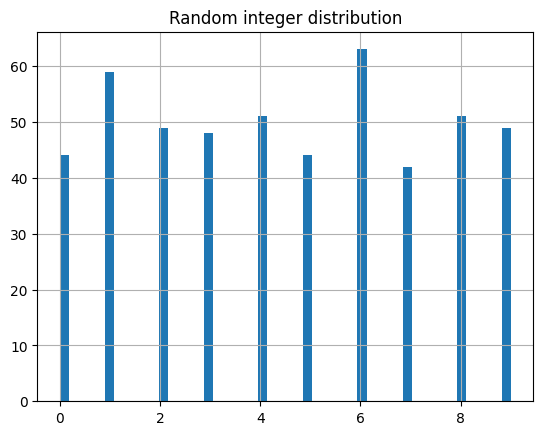

example values:  [array(9, dtype=int64), array(3, dtype=int64), array(5, dtype=int64), array(3, dtype=int64), array(6, dtype=int64)]


In [3]:
# randint

space = [{'example' : hp.randint('example', 10)}]

sample_and_plot(space, 'Random integer distribution')

### uniform

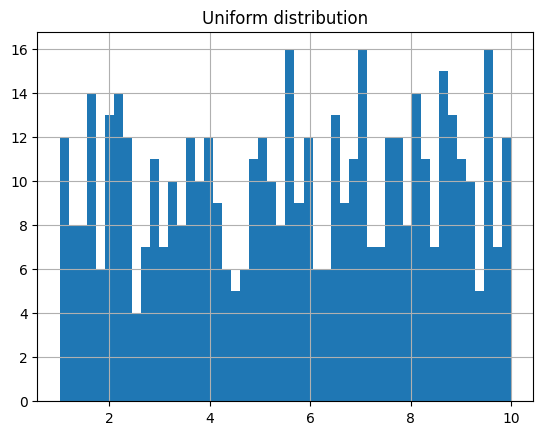

example values:  [4.848376688470346, 3.4875716011162403, 7.917846100736736, 1.5370380141213986, 1.9792605352702077]


In [4]:
# uniform

space = [{'example' : hp.uniform('example', 1, 10)}]

sample_and_plot(space, 'Uniform distribution')

### quniform

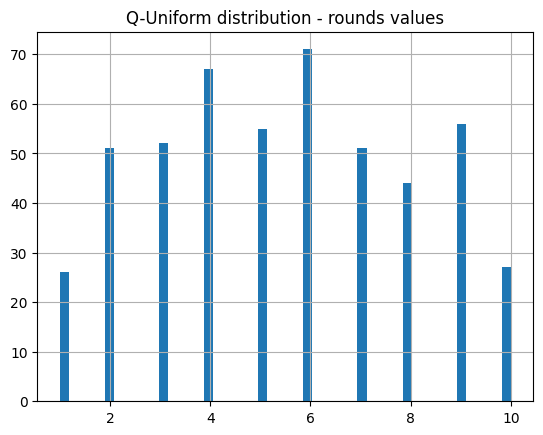

example values:  [6.0, 2.0, 9.0, 2.0, 4.0]


In [5]:
# quniform

space = [{'example' : hp.quniform('example', 1, 10, 1)}]

sample_and_plot(space, 'Q-Uniform distribution - rounds values')

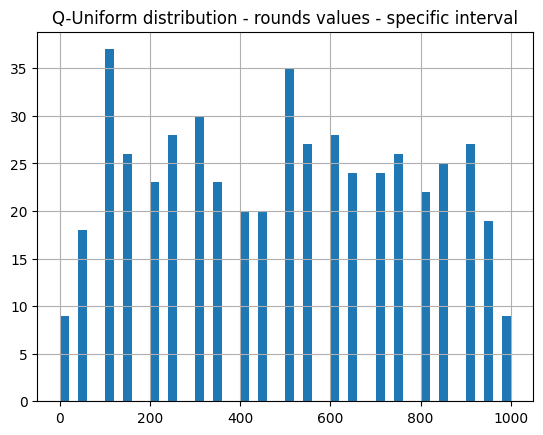

example values:  [200.0, 250.0, 850.0, 850.0, 850.0]


In [6]:
# with quniform we can change the limits (respect to randint)

space = [{'example' : hp.quniform('example', 10, 1000, 50)}]

sample_and_plot(space, 'Q-Uniform distribution - rounds values - specific interval')

### loguniform

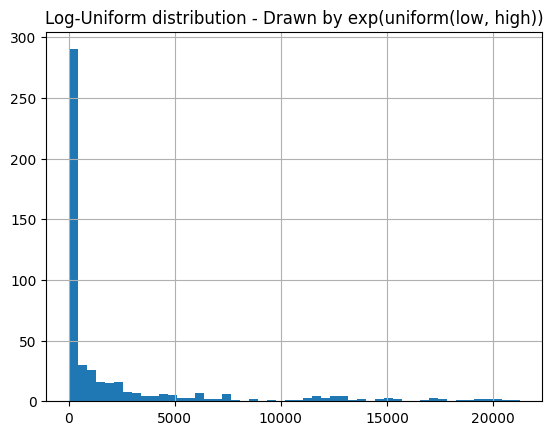

example values:  [2759.7344286879697, 14468.421596969016, 70.53572460096788, 1006.0283741401163, 8.661528856967408]


In [7]:
# loguniform

space = [{'example' : hp.loguniform('example', 1, 10)}]

sample_and_plot(space, 'Log-Uniform distribution - Drawn by exp(uniform(low, high))')

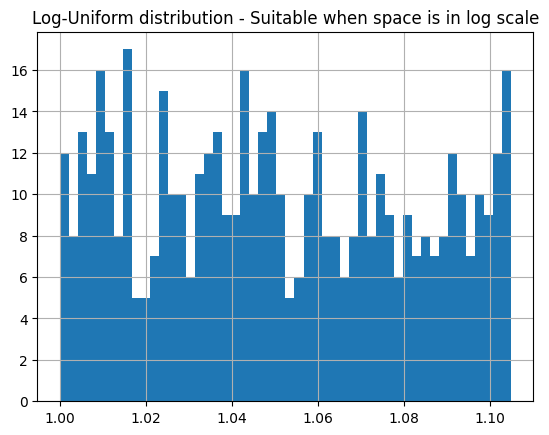

example values:  [1.0278821463820176, 1.0152408914295732, 1.0000036187817396, 1.0455603205225352, 1.022518075214131]


In [8]:
# Attention, the use of loguniform for floats < 1 is unintuitive
# (at least for me)

space = [{'example' : hp.loguniform('example', 0.000001, 0.1)}]

sample_and_plot(space, 'Log-Uniform distribution - Suitable when space is in log scale')

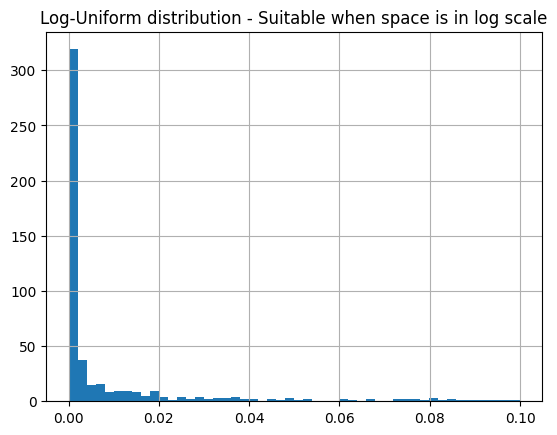

example values:  [0.0007783200706319635, 0.0003540731343642317, 2.273364781726108e-05, 0.0004932656090957941, 0.04706944738262836]


In [9]:
# if we want a log distribution over 0.000001, 0.1
# we need to enter it like this:

space = [{'example' : hp.loguniform('example', np.log(0.000001), np.log(0.1))}]

sample_and_plot(space, 'Log-Uniform distribution - Suitable when space is in log scale')

### q log uniform

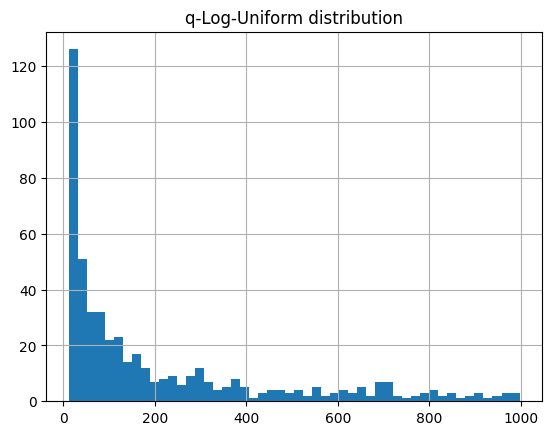

example values:  [653.3078419065004, 375.554208521102, 15.648092021712584, 778.492578080201, 273.84161037997023]


In [10]:
# qloguniform
# example we want to sample trees between 10 and 1000, in increments of 50
# but we think that better values are closer to smaller number of trees,
# so we want to sample more of those

space = [{'example': hp.qloguniform('example', np.log(10), np.log(1000), np.log(50))}]

sample_and_plot(space, 'q-Log-Uniform distribution')

### normal

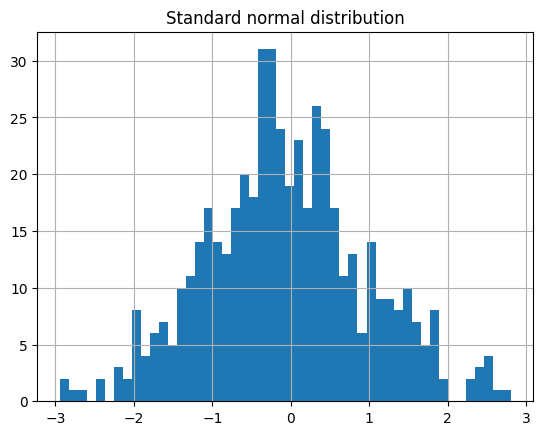

example values:  [-1.0652836450761434, -1.4281733945191253, 0.29381953020249074, -0.3518201864617283, 0.46522752112646626]


In [11]:
# normal

# the standard normal
space = [{'example': hp.normal('example', 0, 1)}]

sample_and_plot(space, 'Standard normal distribution')

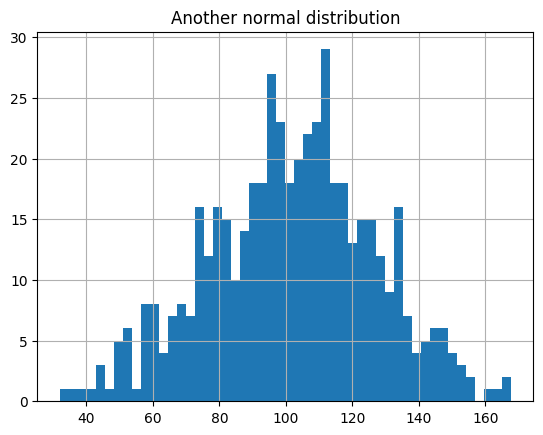

example values:  [123.81689646834757, 62.841412001818256, 91.45702071560527, 117.49582784731527, 98.06529032179236]


In [12]:
# normal

space = [{'example': hp.normal('example', 100, 25)}]

sample_and_plot(space, 'Another normal distribution')

### q normal

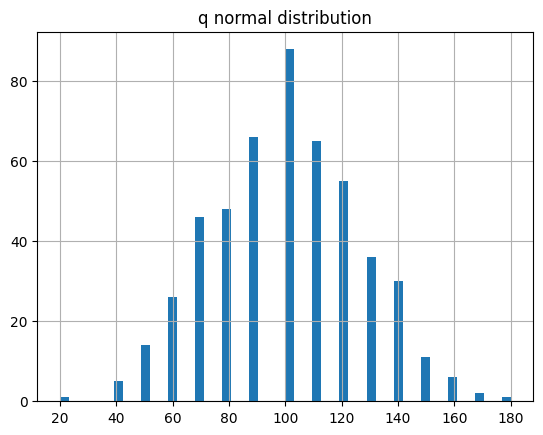

example values:  [110.0, 90.0, 110.0, 130.0, 110.0]


In [13]:
# qnormal
# same as previous but at discrete intervals

space = [{'example': hp.qnormal('example', 100, 25, 10)}]

sample_and_plot(space, 'q normal distribution')

### log normal

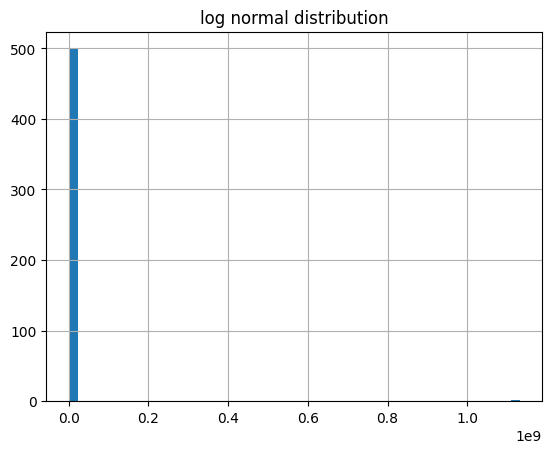

example values:  [1322.721806614542, 29.356203672579625, 501.3718645414147, 20.041466580240087, 67.8095129463138]


In [14]:
# lognormal

space = [{'example': hp.lognormal('example', np.log(100), np.log(25))}]

sample_and_plot(space, 'log normal distribution')

### q log normal

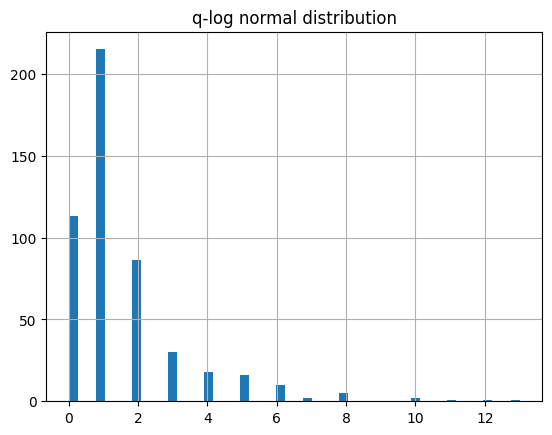

example values:  [1.0, 1.0, 0.0, 3.0, 1.0]


In [15]:
# q-lognormal

space = [{'example': hp.qlognormal('example', 0, 1, 1)}]

sample_and_plot(space, 'q-log normal distribution')

## Categorical hyperparameters

In [16]:
def sample_and_plot(space, title):
    
    vals_ls = []
    
    for i in range(500):
        v = sample(space)
        v = v[0]['example']
        vals_ls.append(v)

    pd.Series(vals_ls).value_counts().plot.bar()
    plt.title(title)
    plt.ylabel('Number of draws')
    plt.show()
    
    print('example values: ', vals_ls[0:5])

### choice

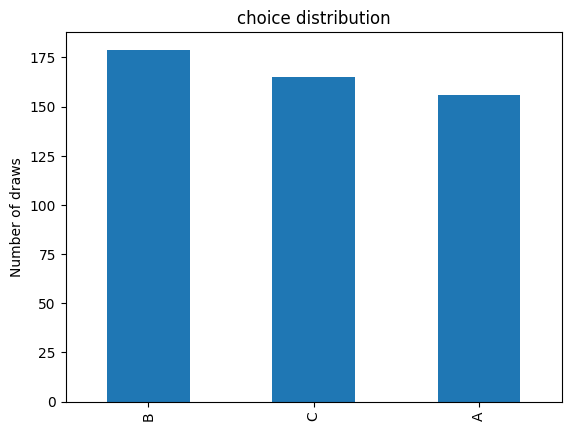

example values:  ['A', 'C', 'A', 'A', 'A']


In [17]:
# choice

space = [{'example': hp.choice('example', ['A', 'B', 'C'])}]

sample_and_plot(space, 'choice distribution')

### pchoice

Draws from a list with a user specified probability.

In [18]:
# pchoice

# example from the Hyperopt article

space = hp.pchoice('example', [
    (0.8, {'use_var': 'x', 'x': hp.normal('x', 0, 1)}),
    (0.2, {'use_var': 'y', 'y': hp.uniform('y', 1, 3)})])

In [19]:
# draw samples from space

for i in range(20):
        v = sample(space)
        print(v)

{'use_var': 'x', 'x': 0.7920645772087395}
{'use_var': 'x', 'x': -0.8369330213526223}
{'use_var': 'x', 'x': 0.8686113499902576}
{'use_var': 'x', 'x': 0.8964610057209379}
{'use_var': 'x', 'x': 0.38355984729538706}
{'use_var': 'x', 'x': 0.5652772087996011}
{'use_var': 'x', 'x': -0.8326385631294965}
{'use_var': 'x', 'x': -0.1626445917091221}
{'use_var': 'x', 'x': -0.4142269212484899}
{'use_var': 'x', 'x': -1.6815926308371698}
{'use_var': 'x', 'x': -0.5418072368343063}
{'use_var': 'x', 'x': -0.3362482482689783}
{'use_var': 'x', 'x': -1.1266142118078437}
{'use_var': 'x', 'x': -0.07760502470113563}
{'use_var': 'x', 'x': 1.0780902730498714}
{'use_var': 'y', 'y': 1.0205863720156947}
{'use_var': 'y', 'y': 1.1708968448372945}
{'use_var': 'x', 'x': -0.3947503504911281}
{'use_var': 'x', 'x': -1.9119035573134782}
{'use_var': 'x', 'x': 0.1852406184873953}


In [20]:
# our own example, realistic, 

# if we want to sample
# a loss function but think that deviance is likely better
# than exponential

space = hp.pchoice('example', [
    (0.8, {'loss': 'deviance'}),
    (0.2, {'loss': 'exponential'})])

# draw samples from space

for i in range(20):
        v = sample(space)
        print(v)

{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'exponential'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'exponential'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}


In [21]:
# our own example, continuing from choice

space = hp.pchoice('example', [
    (0.8, {'use_var': 'x', 'x': hp.choice('a', ['A', 'B'])}),
    (0.2, {'use_var': 'y', 'y': hp.choice('a', ['C', 'D'])})])

In [22]:
# draw samples from space

for i in range(20):
        v = sample(space)
        print(v)

{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'y', 'y': 'D'}
{'use_var': 'y', 'y': 'D'}
{'use_var': 'y', 'y': 'D'}
{'use_var': 'y', 'y': 'D'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'A'}


In [23]:
# capture data in a dataframe

vals_ls = []
for i in range(500):
        v = sample(space)
        vals_ls.append(v)
        
v = pd.DataFrame(vals_ls)
v.head()

,use_var,x,y
0,x,B,NaN
1,y,NaN,C
2,x,A,NaN
3,x,A,NaN
4,x,B,NaN


In [24]:
v['use_var'].value_counts(normalize=True)

x    0.782
y    0.218
Name: use_var, dtype: float64

In [25]:
v['x'].value_counts(normalize=True, dropna=True)

B    0.526854
A    0.473146
Name: x, dtype: float64

In [26]:
v['x'].value_counts(normalize=True, dropna=False)

B      0.412
A      0.370
NaN    0.218
Name: x, dtype: float64

In [27]:
v['y'].value_counts(normalize=True)

D    0.541284
C    0.458716
Name: y, dtype: float64

In [28]:
v['y'].value_counts(normalize=True, dropna=False)

NaN    0.782
D      0.118
C      0.100
Name: y, dtype: float64

## Nested spaces

In [29]:
space = hp.choice('classifier_type', [
    {
        'type': 'naive_bayes',
    },
    {
        'type': 'svm',
        'C': hp.lognormal('svm_C', 0, 1),
        'kernel': hp.choice('svm_kernel', [
            {'ktype': 'linear'},
            {'ktype': 'RBF', 'width': hp.lognormal('svm_rbf_width', 0, 1)},
            ]),
    },
    {
        'type': 'dtree',
        'criterion': hp.choice('dtree_criterion', ['gini', 'entropy']),
        'max_depth': hp.choice('dtree_max_depth',
            [None, hp.qlognormal('dtree_max_depth_int', 3, 1, 1)]),
        'min_samples_split': hp.qlognormal('dtree_min_samples_split', 2, 1, 1),
    },
    ])

In [30]:
for i in range(20):
        v = sample(space)
        print(v)
        print()

{'type': 'naive_bayes'}

{'C': 2.566765640893828, 'kernel': {'ktype': 'linear'}, 'type': 'svm'}

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 3.0, 'type': 'dtree'}

{'type': 'naive_bayes'}

{'criterion': 'entropy', 'max_depth': 33.0, 'min_samples_split': 8.0, 'type': 'dtree'}

{'criterion': 'entropy', 'max_depth': 58.0, 'min_samples_split': 12.0, 'type': 'dtree'}

{'C': 13.220555748047879, 'kernel': {'ktype': 'linear'}, 'type': 'svm'}

{'criterion': 'entropy', 'max_depth': 24.0, 'min_samples_split': 17.0, 'type': 'dtree'}

{'C': 5.833544467763127, 'kernel': {'ktype': 'RBF', 'width': 0.6686665550582409}, 'type': 'svm'}

{'criterion': 'entropy', 'max_depth': 5.0, 'min_samples_split': 8.0, 'type': 'dtree'}

{'type': 'naive_bayes'}

{'C': 0.9066054263955711, 'kernel': {'ktype': 'RBF', 'width': 0.5891838568849687}, 'type': 'svm'}

{'C': 0.2762735761192163, 'kernel': {'ktype': 'RBF', 'width': 0.22691464332431174}, 'type': 'svm'}

{'C': 2.015243262129185, 'kernel': {'ktype